## **Wikipedia Votes Graph Analytics**

In [ ]:
!pip install pyg-nightly
!pip install scipy==1.8.1
!pip install -q grpcio

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
wiki = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CMP7202-Web Social Media Analytics and Visualisation/Assessment 2/soc-wiki-Vote.txt",sep=" ",names=["start_node", "end_node"])
wiki

start_node  end_node
0              8         1
1             19         1
2             36         1
3              3         2
4              4         2
...          ...       ...
2909         872       861
2910         882       862
2911         870       864
2912         874       864
2913         885       884

[2914 rows x 2 columns]

The graph is created from the wiki dataframe of the edges:

In [4]:
G = nx.from_pandas_edgelist(wiki, "start_node", "end_node")

n = len(G)
m = len(G.edges())
n, m


(889, 2914)

Visualizing the graph

Since we don’t have any real sense of structure in the data, let’s start by viewing the graph with random layout, which is among the fastest of the layout functions.

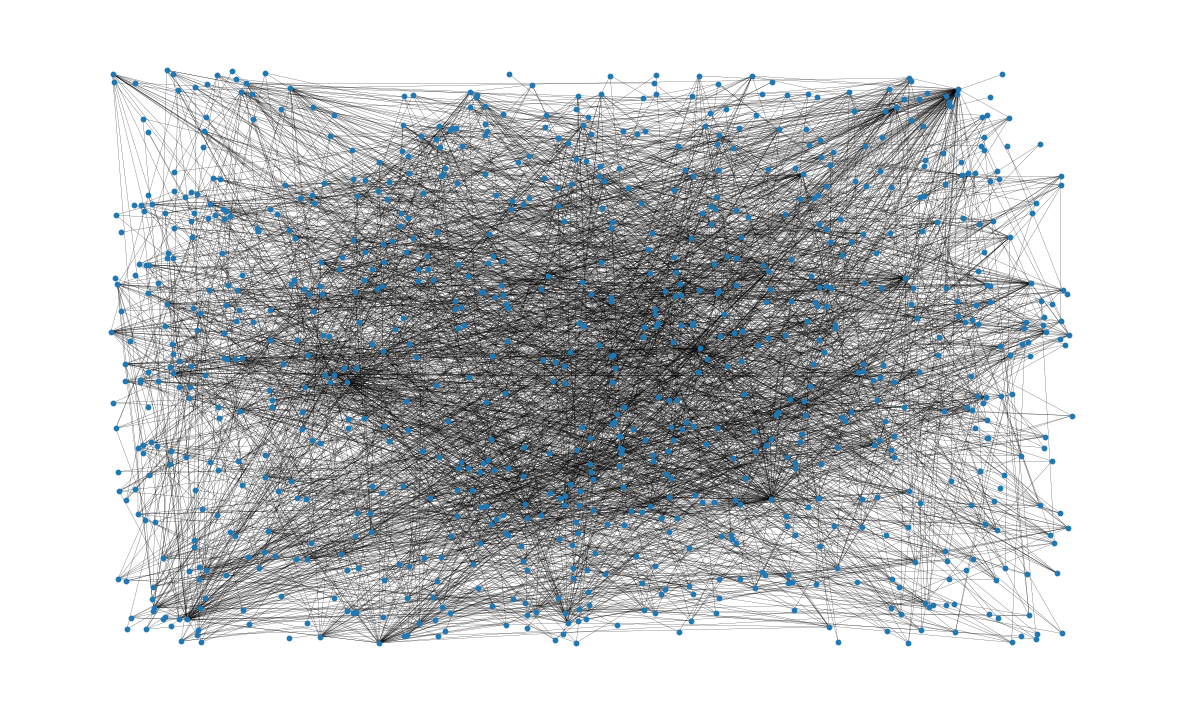

In [5]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

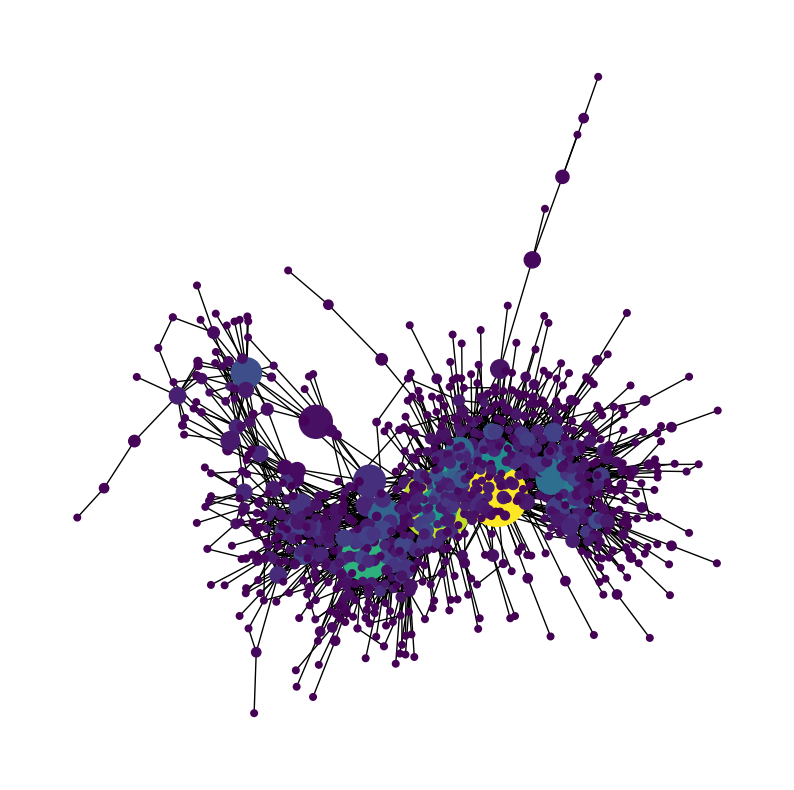

In [6]:
from scipy import sparse
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

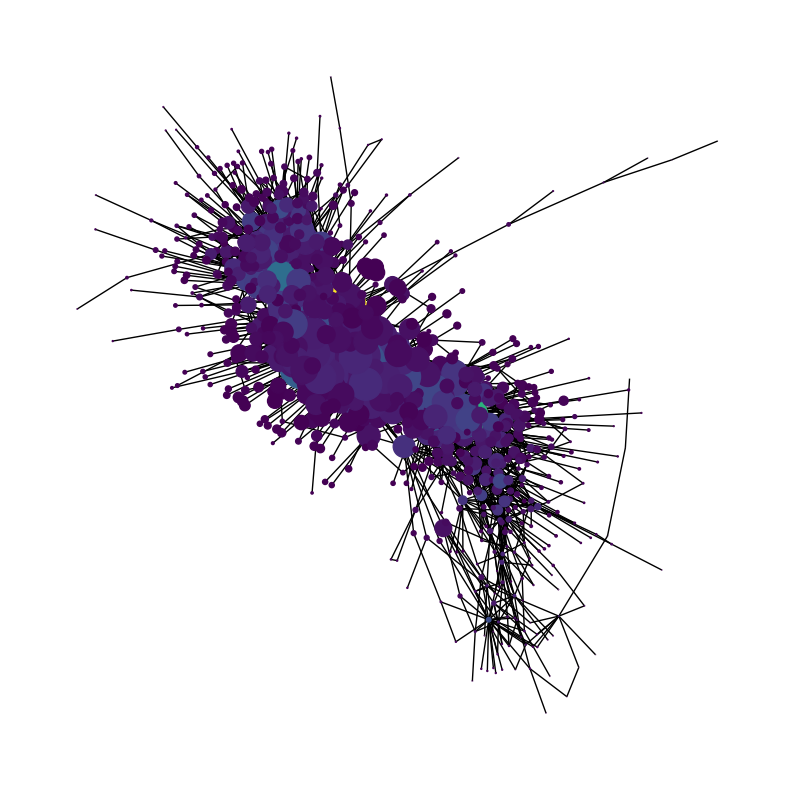

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Positioning nodes using spring layout
pos = nx.spring_layout(G)

# Node color based on degree
node_color = [20000.0 * G.degree(v) for v in G]

# Node size based on eigenvector centrality
node_size = [v * 10000 for v in eigenvector_centrality.values()]

# Plotting the network
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')
plt.show()


In [9]:
#Total number of nodes in network
G.number_of_nodes()


889

In [10]:
#Total number of edges
G.number_of_edges()

2914

In [11]:
np.mean([d for _, d in G.degree()])

6.555680539932508

In [12]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(431, 0.11486486486486486),
 (273, 0.1036036036036036),
 (170, 0.07432432432432433),
 (536, 0.06756756756756757),
 (399, 0.06306306306306306),
 (204, 0.061936936936936936),
 (550, 0.05630630630630631),
 (416, 0.05518018018018018)]

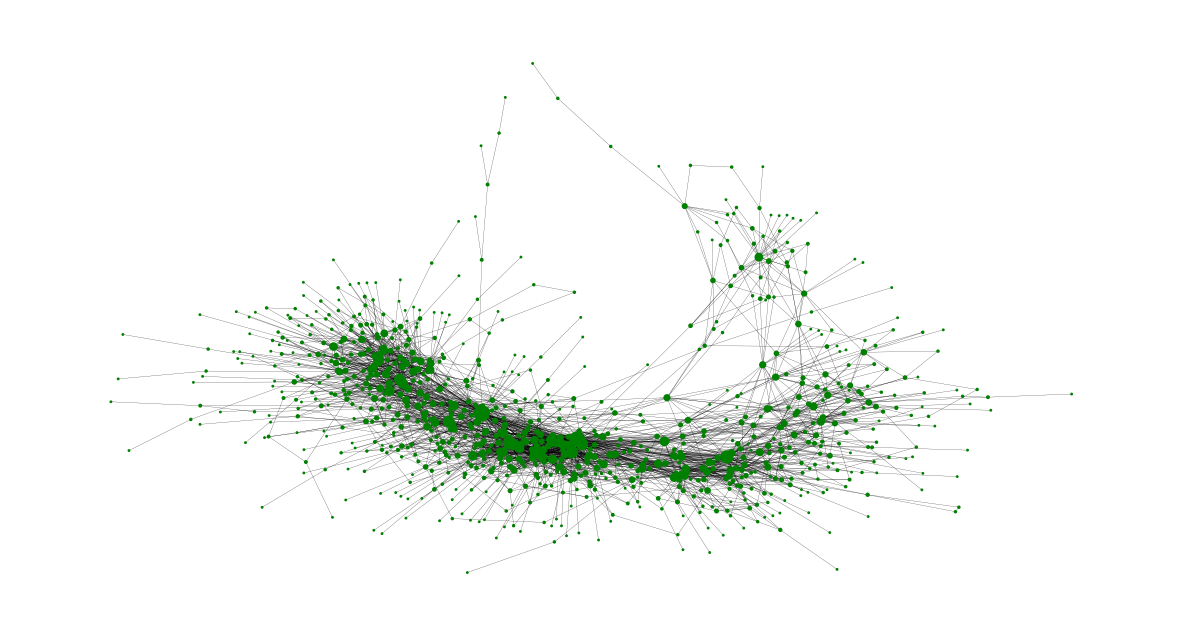

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

degree_centrality = nx.degree_centrality(G)

# Positioning nodes using spring layout
pos = nx.spring_layout(G)

# Node size based on degree centrality
node_size = [v * 1000 for v in degree_centrality.values()]

# Define node color
node_color = 'green'

# Plotting the network
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color=node_color, with_labels=False, width=0.15)
plt.axis("off")
plt.show()


(-0.8053289872407913,
 0.8853023272752761,
 -0.6293810528516769,
 1.1548280638456343)

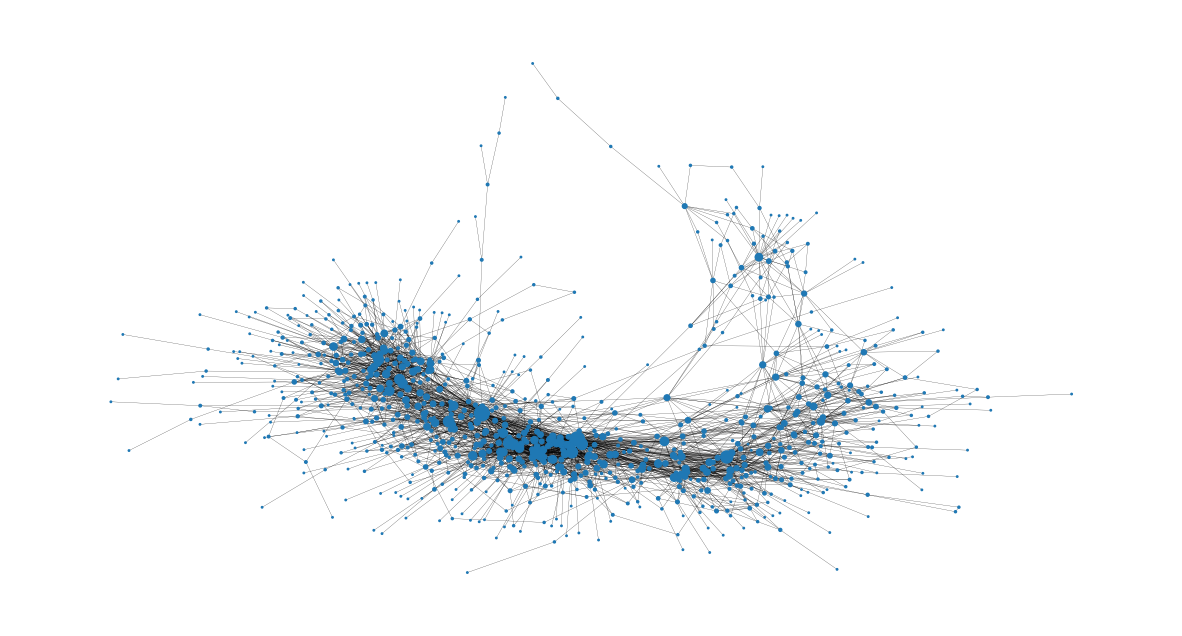

In [15]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [16]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(273, 0.25377565538555935),
 (431, 0.18841894862401887),
 (170, 0.11283653180857324),
 (204, 0.07561248876313527),
 (736, 0.05774695853512937),
 (550, 0.05621414863964403),
 (21, 0.053901611174382975),
 (230, 0.05381077080860616)]

In [17]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_node  2914 non-null   int64
 1   end_node    2914 non-null   int64
dtypes: int64(2)
memory usage: 45.7 KB


(-0.8053289872407913,
 0.8853023272752761,
 -0.6293810528516769,
 1.1548280638456343)

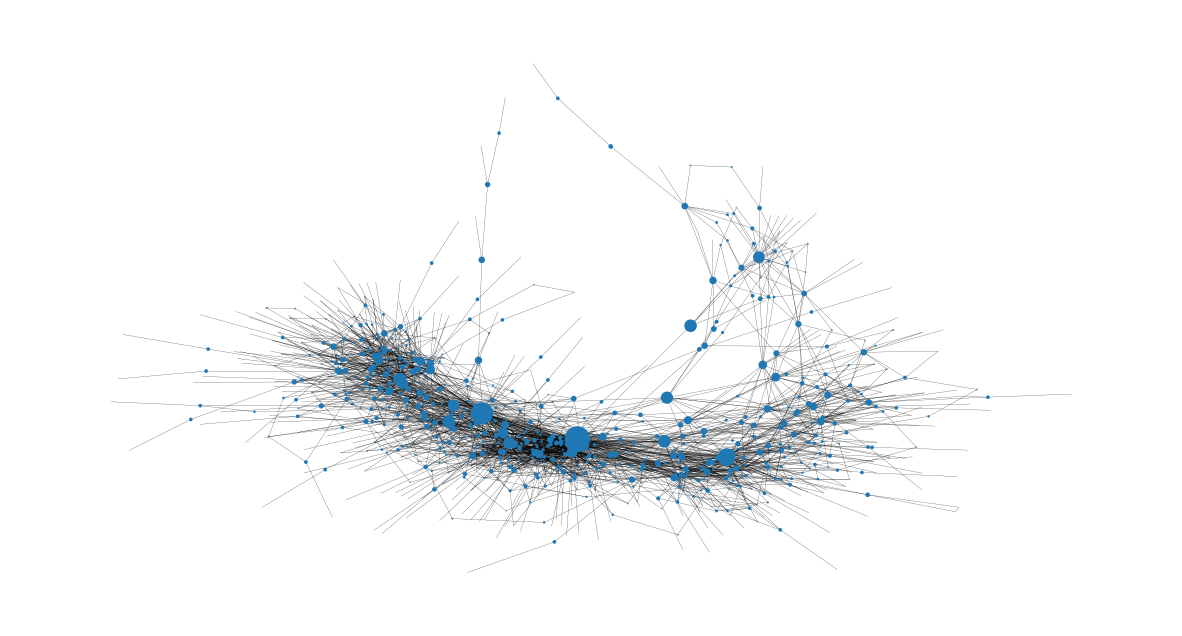

In [18]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

Top 5 Eigenvector Centrality Values:
Node 273: 0.2852399137391541
Node 431: 0.2791279493271889
Node 536: 0.22124652294171177
Node 399: 0.21350736615246194
Node 416: 0.21044572079769291


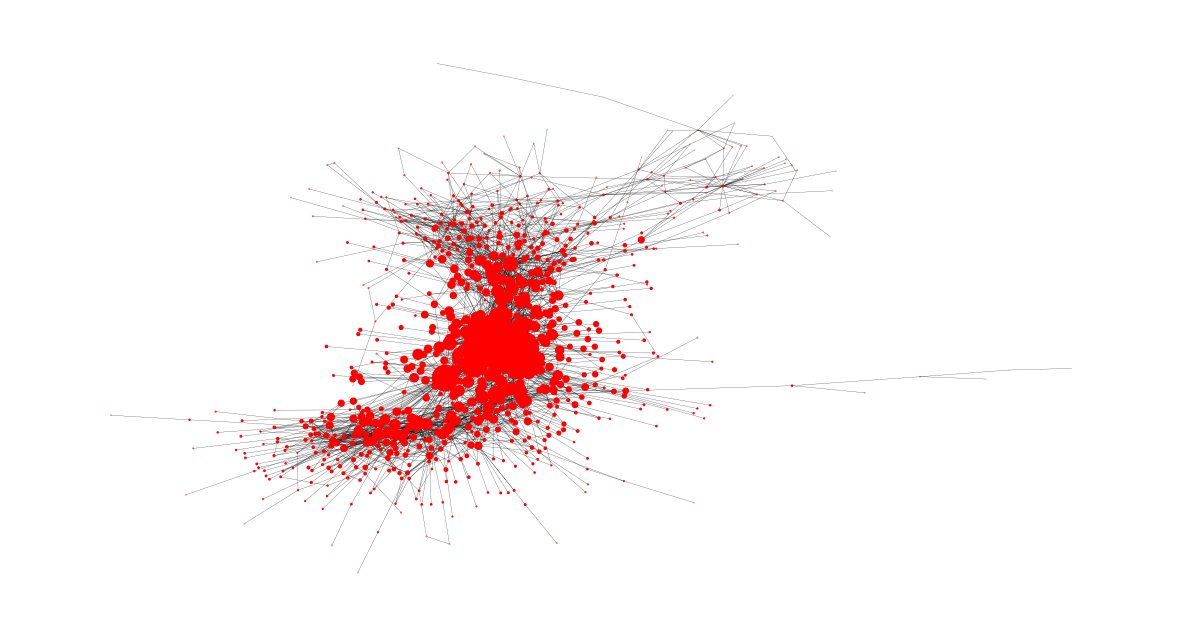

In [19]:

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Get the top 5 nodes with highest eigenvector centrality
top_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Print top 5 eigenvector centrality values
print("Top 5 Eigenvector Centrality Values:")
for node, centrality in top_nodes:
    print(f"Node {node}: {centrality}")

# Positioning nodes using spring layout
pos = nx.spring_layout(G)

# Node size based on eigenvector centrality
node_size = [v * 1200 for v in eigenvector_centrality.values()]

# Define node color
node_color = 'red'

# Plotting the network
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15, node_color=node_color)
plt.axis("off")
plt.show()


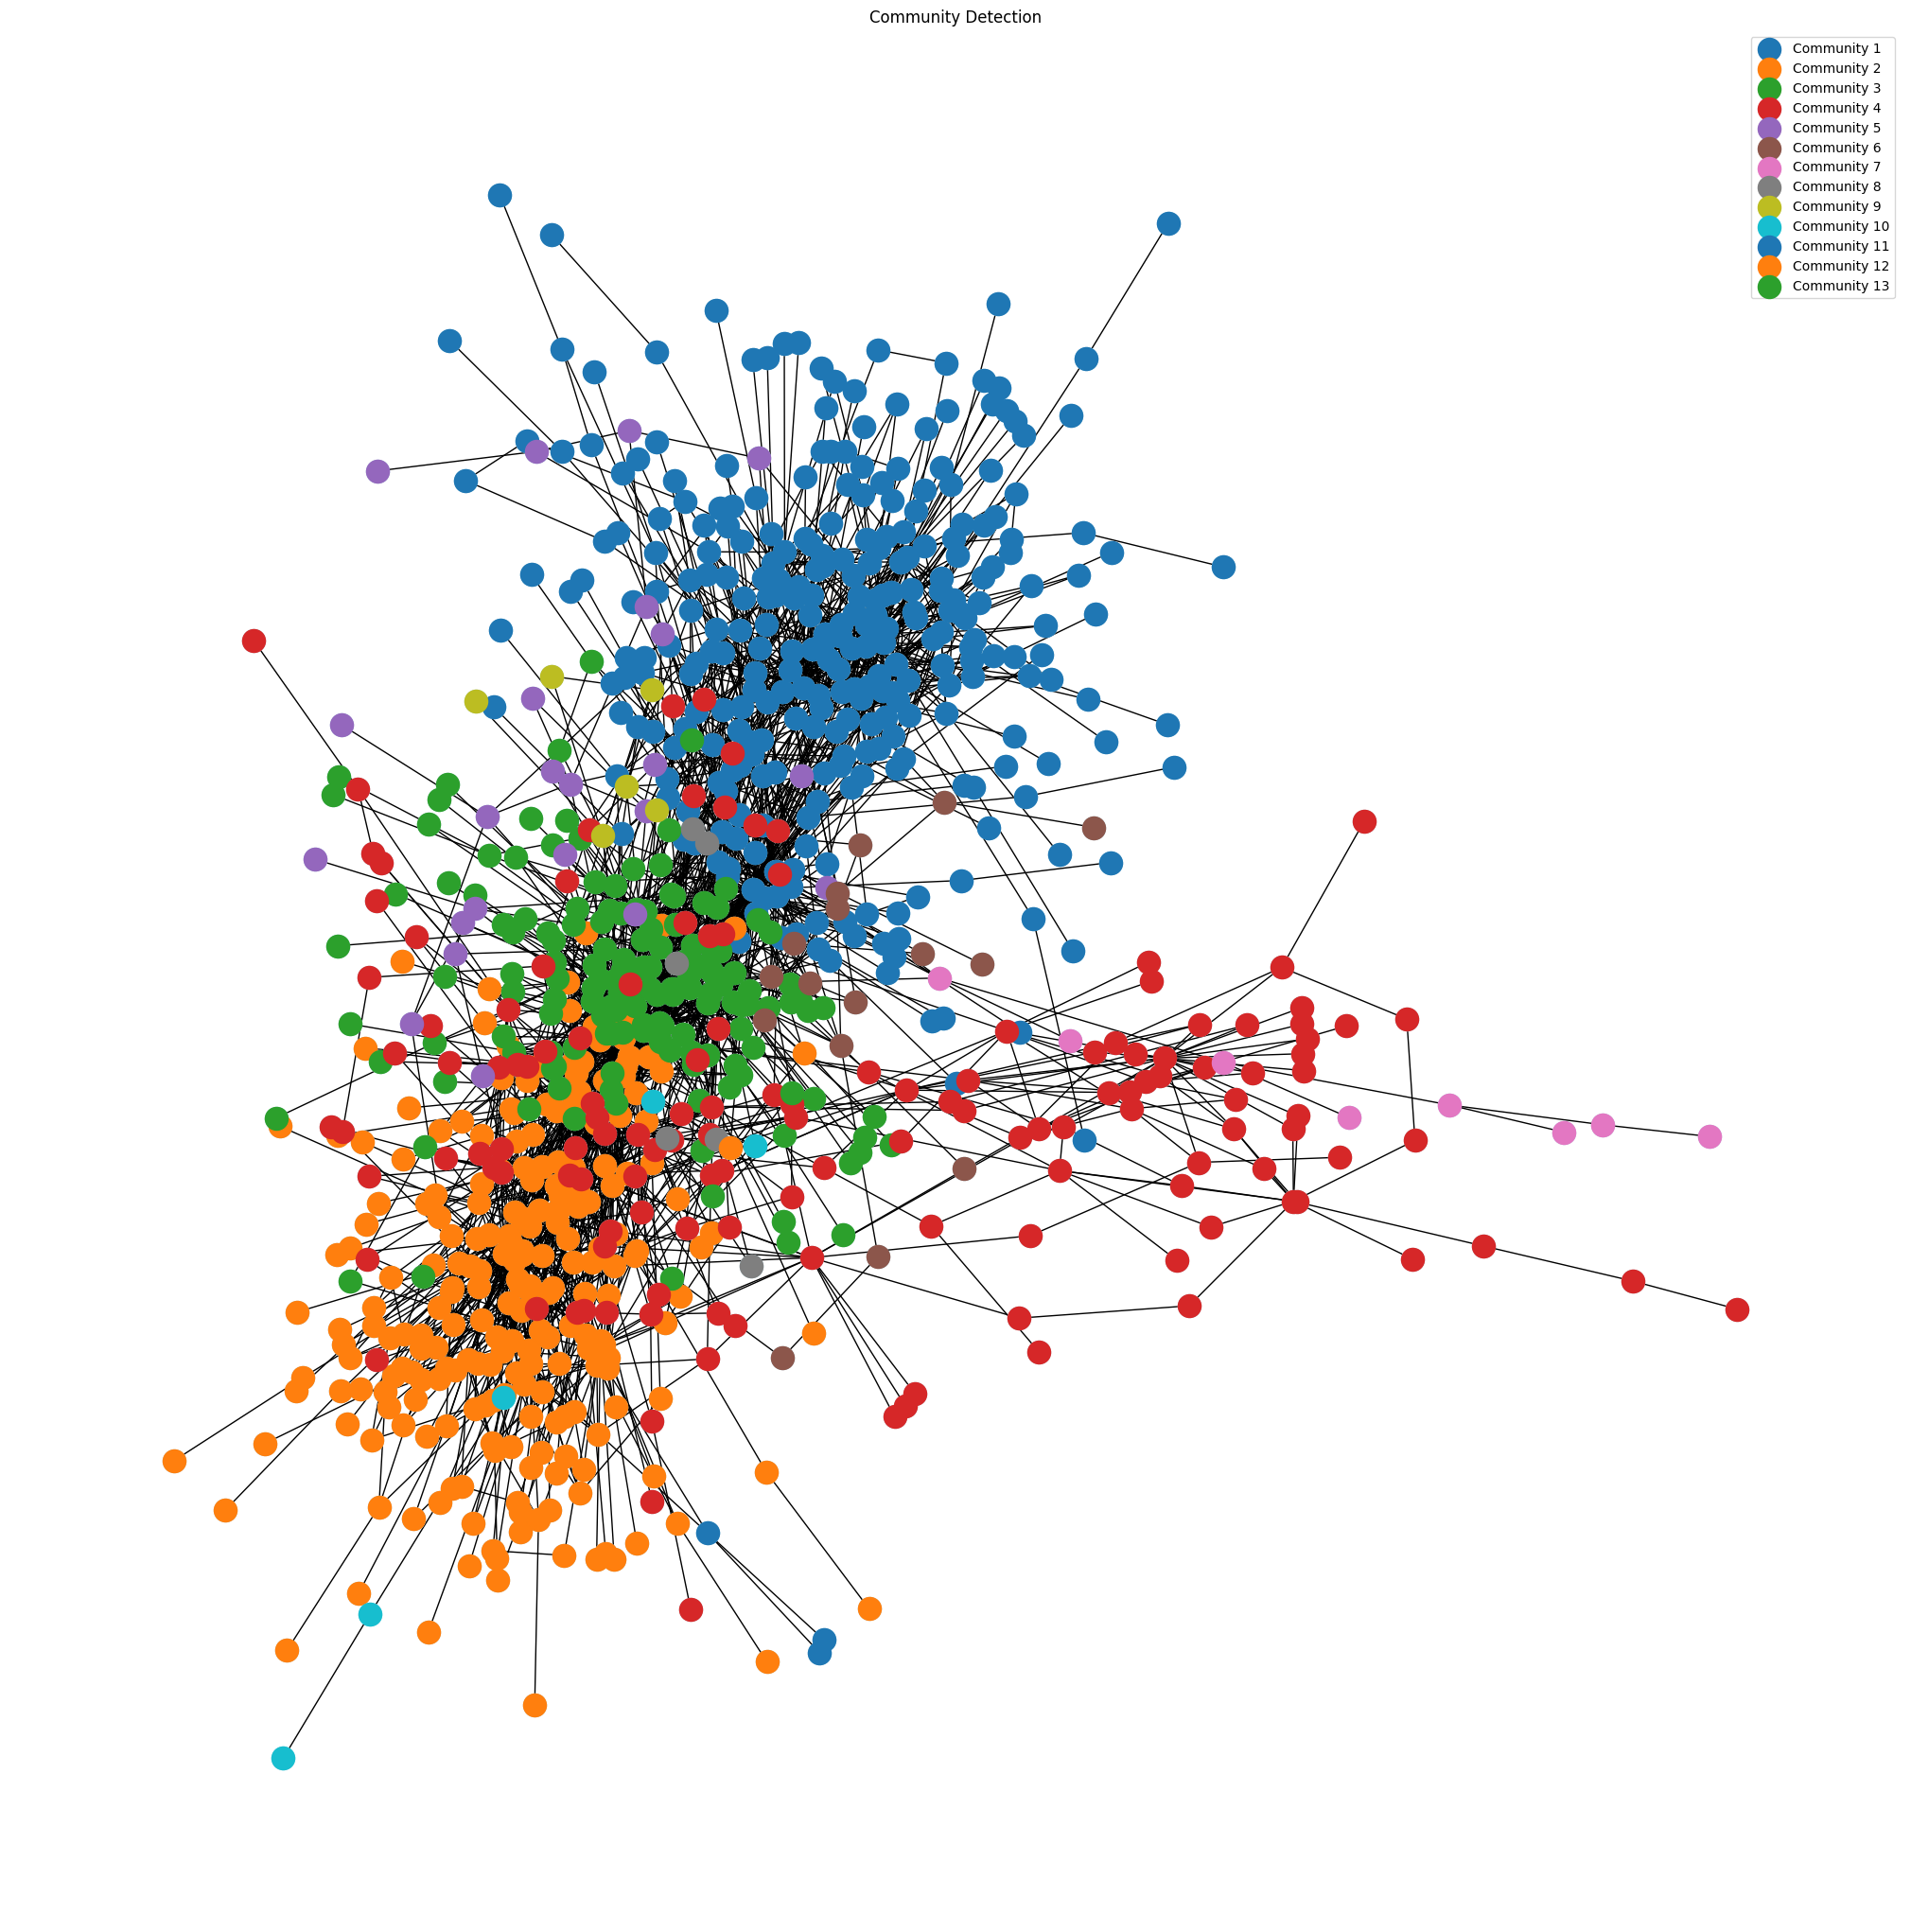

In [23]:

# Function to convert DataFrame to NetworkX graph
def df_to_graph(df):
    G = nx.from_pandas_edgelist(df, 'start_node', 'end_node')
    return G

# Function to detect communities using Louvain method
def detect_communities(graph):
    communities = nx.algorithms.community.greedy_modularity_communities(graph)
    return communities

# Function to visualize the communities
# Function to visualize the communities
def visualize_communities(graph, communities):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(20, 20))
    nx.draw(graph, pos, node_color='lightblue', with_labels=False)  # Changed with_labels to False
    for i, com in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=list(com), node_color=f'C{i}', label=f'Community {i+1}')
    plt.legend()
    plt.title("Community Detection")
    plt.show()

# Example usage
if __name__ == "__main__":


    # Convert DataFrame to NetworkX graph
    graph = df_to_graph(wiki)

    # Detect communities
    communities = detect_communities(graph)

    # Visualize communities
    visualize_communities(graph, communities)


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


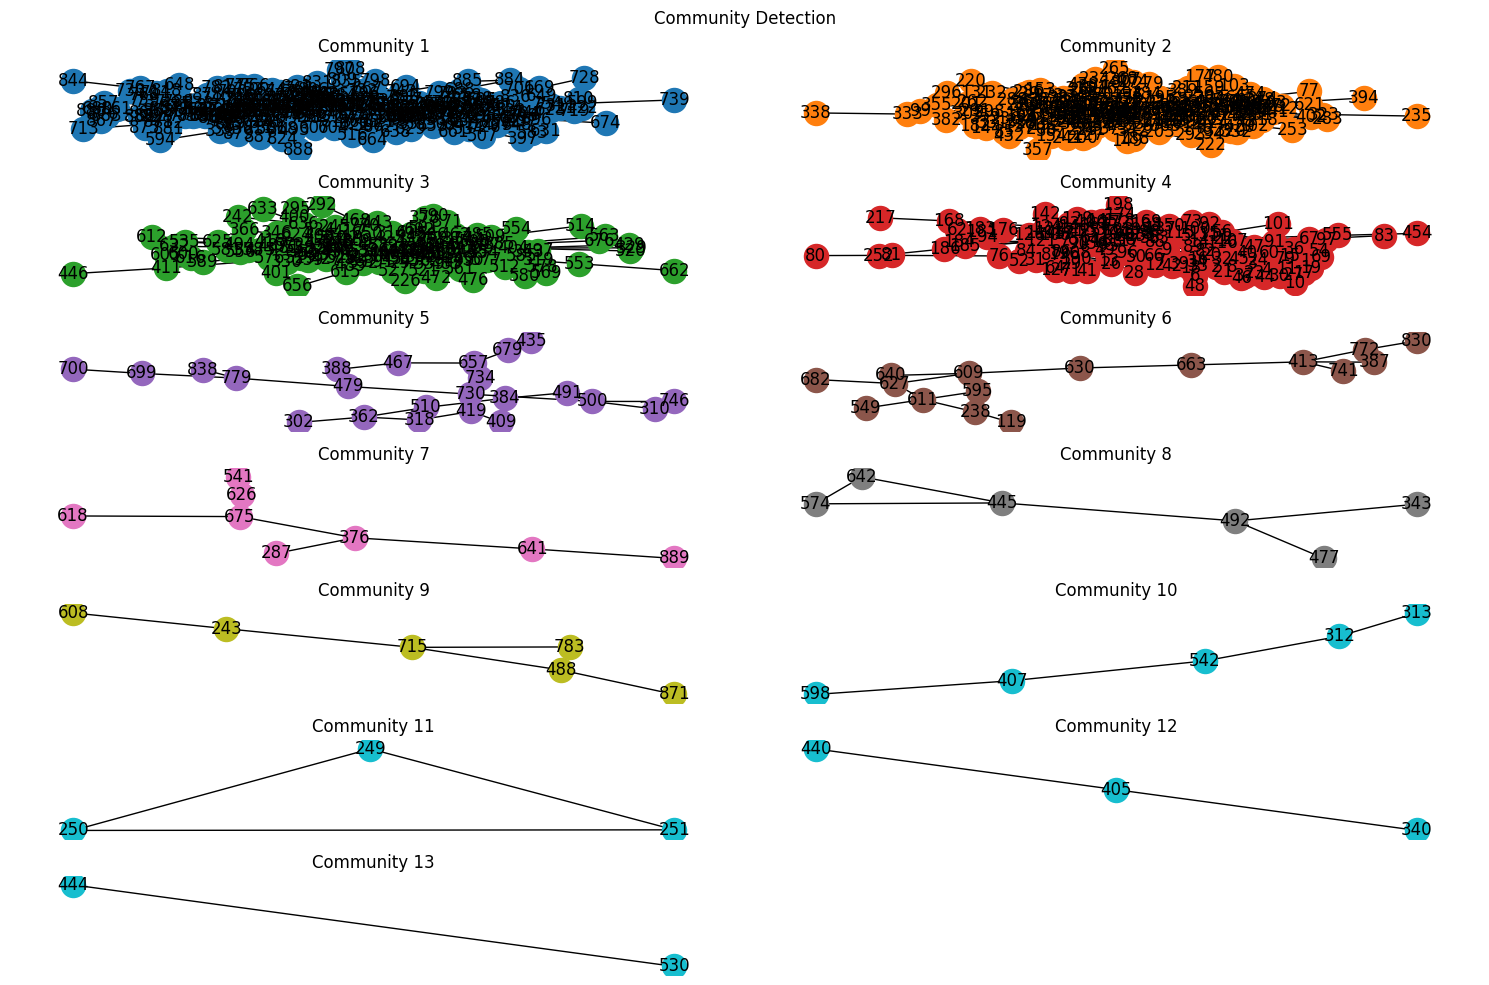

In [24]:

# Function to convert DataFrame to NetworkX graph
def df_to_graph(df):
    G = nx.from_pandas_edgelist(df, 'start_node', 'end_node')
    return G

# Function to detect communities using Louvain method
def detect_communities(graph):
    communities = nx.algorithms.community.greedy_modularity_communities(graph)
    return communities



# Function to visualize the communities as subplots with different colors for each community
def visualize_communities_subplots(graph, communities):
    plt.figure(figsize=(15, 10))
    num_communities = len(communities)
    rows = (num_communities + 1) // 2

    # Generate a list of distinct colors for communities
    colors = [plt.cm.tab10(i) for i in range(num_communities)]  # You can change the colormap as needed

    for i, com in enumerate(communities, start=1):
        plt.subplot(rows, 2, i)
        subgraph = graph.subgraph(com)
        pos = nx.spring_layout(subgraph)
        nx.draw(subgraph, pos, with_labels=True, node_color=colors[i-1])  # Assign a unique color to each community
        plt.title(f'Community {i}')

    plt.suptitle('Community Detection')
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":


    # Convert DataFrame to NetworkX graph
    graph = df_to_graph(wiki)

    # Detect communities
    communities = detect_communities(graph)

    # Visualize communities as subplots
    visualize_communities_subplots(graph, communities)


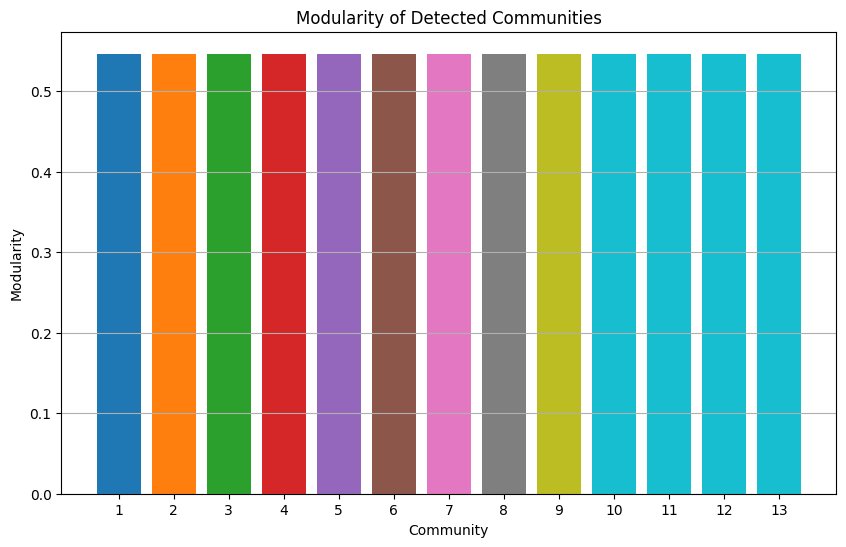

In [26]:

# Function to convert DataFrame to NetworkX graph
def df_to_graph(df):
    G = nx.from_pandas_edgelist(df, 'start_node', 'end_node')
    return G

# Function to detect communities using Louvain method
def detect_communities(graph):
    communities = nx.algorithms.community.greedy_modularity_communities(graph)
    return communities

# Function to calculate modularity
def calculate_modularity(graph, communities):
    modularity = nx.algorithms.community.modularity(graph, communities)
    return modularity

# Function to visualize the communities
def visualize_communities(graph, communities):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(20, 20))
    nx.draw(graph, pos, node_color='lightblue', with_labels=False)
    for i, com in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=list(com), node_color=f'C{i}', label=f'Community {i+1}')
    plt.legend()
    plt.title("Community Detection")
    plt.show()

# Function to visualize modularity
def plot_modularity(graph, communities, modularity):
    plt.figure(figsize=(10, 6))
    num_communities = len(communities)
    community_indices = range(1, num_communities + 1)
    colors = plt.cm.tab10(range(num_communities))  # Choose a colormap for the colors
    plt.bar(community_indices, modularity, color=colors)
    plt.xlabel('Community')
    plt.ylabel('Modularity')
    plt.title('Modularity of Detected Communities')
    plt.xticks(community_indices)
    plt.grid(axis='y')
    plt.show()

# Example usage
if __name__ == "__main__":

    # Convert DataFrame to NetworkX graph
    graph = df_to_graph(wiki)

    # Detect communities
    communities = detect_communities(graph)

    # Visualize communities
    #visualize_communities(graph, communities)

    # Calculate modularity
    modularity = calculate_modularity(graph, communities)

    # Plot modularity
    plot_modularity(graph, communities, [modularity])
